# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [777]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [778]:
# Load Data 
data = pd.read_csv("2wk_Regression_assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## 간단한 EDA // FE 진행

#### 열 제거

In [779]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
#Unnamed: 0에 대한 필요없는 열 제거

#### 결측치 처리

In [780]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [781]:
data.drop('New_Price', inplace = True, axis = 1)
#New_Price 변수는 결측치 (NaN이 훨씬 많기 때문에 제거함)

In [782]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


단위 제거 및 수치형 변수로 변환

In [783]:
data['Mileage'] = data['Mileage'].str.replace(" km/kg","")
data['Mileage'] = data['Mileage'].str.replace(" kmpl","")
data['Engine'] = data['Engine'].str.replace(" CC","")

data['Power'] = data['Power'].str.replace(" bhp","")
data['Power'] = data['Power'].apply(lambda x: None if x == "null" else x)
data['Power'] = data['Power'].apply(lambda x: None if x == "" else x)

data['Mileage'] = pd.to_numeric(data['Mileage'])
data['Engine'] = pd.to_numeric(data['Engine'])
data['Power'] = pd.to_numeric(data['Power'])

Engine과 Power, Seats의 경우 null 값이 존재하기 때문에 이를 확인하고자 한다.

In [784]:
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93


In [785]:
data[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.20
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,NaN,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,NaN,6.0,1.70


In [786]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,1.70


결측치가 있고, 특히Engine이 null일 경우 power와 seats 또한 null 경우가 많은 것들도 확인할 수 있다. 따라서 해당 변수가 결측치인 경우 행 삭제 진행

In [787]:
""" data = data.dropna(subset=["Engine"])
data = data.dropna(subset=["Seats"])
data = data.dropna(subset=["Power"]) """
data = data[data['Engine'].notna()]
data = data[data['Seats'].notna()]
data = data[data['Power'].notna()]
data = data[data['Mileage'].notna()]

In [788]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [789]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [790]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


#### `Target` 분석

<Axes: ylabel='Density'>

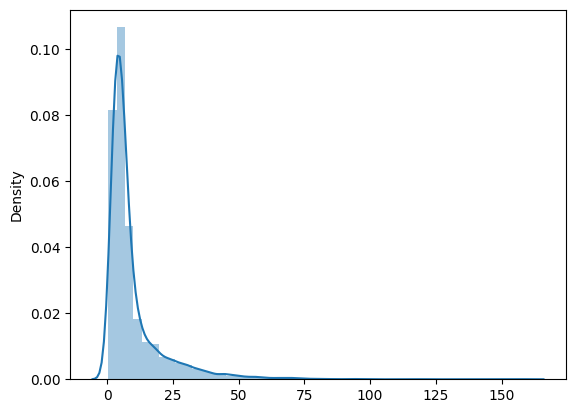

In [791]:
sns.distplot(data[["Price"]])

왼쪽으로 매우 치우쳐져 있는 것을 확인할 수 있다. `따라서 로그를 취함으로써 정규분포 형태에 맞추고자 한다.`

<Axes: xlabel='log_price', ylabel='Density'>

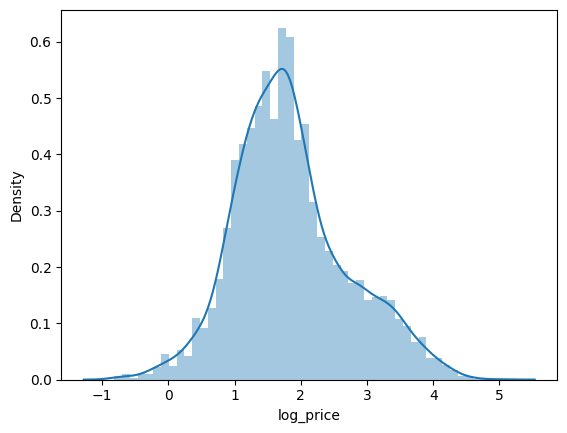

In [792]:
data['log_price'] = np.log(data['Price'])
sns.distplot(data["log_price"])

로그를 취했을 때 더 안정적인 형태의 분포가 보이는 것을 확인할 수 있다.

#### `Name`

`브랜드는 차 가격에 정말 큰 영향을 미친다.`
따라서 차 이름 중에서 브랜드만 뽑아내서 카테고리컬 변수로 이용하고자 한다.

In [793]:
data.Name.value_counts(normalize=True)
# 현재 데이터 셋 중에서 비중이 높은 차량 존재

Name
Mahindra XUV500 W8 2WD                 0.008345
Maruti Swift VDI                       0.007663
Honda City 1.5 S MT                    0.005790
Maruti Swift Dzire VDI                 0.005790
Maruti Ritz VDi                        0.005109
                                         ...   
Hyundai i20 2015-2017 1.4 Magna ABS    0.000170
Ford EcoSport 1.5 Petrol Trend         0.000170
Volvo XC90 2007-2015 D5 AWD            0.000170
Mahindra Scorpio S2 7 Seater           0.000170
Mahindra Xylo D4 BSIV                  0.000170
Name: proportion, Length: 1811, dtype: float64

In [794]:
data.Name.nunique()
# 서로 다른 차량의 이름은 총 1876개 존재

1811

In [795]:
data['brand'] = data.Name.apply(lambda x: x.split(' ')[0])
# Name 변수에서 차량의 브랜드(이름 중 맨 앞에 나오는 부분)만 추출해서 대입

data['brand'].value_counts()
# 평소에 우리가 알고 있는 브랜드부터 생소한 브랜드까지 다양하게 존재

brand
Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

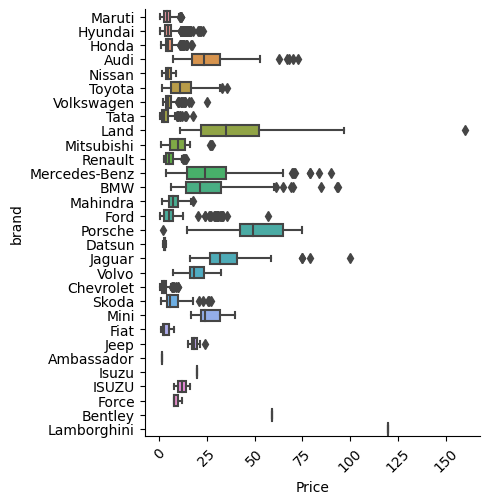

In [796]:
# catplot 이용
def cat_plot(cols, target, data):
    #plt.figure(figsize=(20,15))
    sns.catplot(x=cols, y=target, data = data, kind = "box")
    plt.xticks(rotation =45)

cat_plot("Price", "brand", data=data)

#### Location

`위치가 가격에 미치는 영향은 미미할 것으로 생각이 된다.`

In [797]:
# 비중이 높은 위치 파악
data.Location.value_counts(normalize=True)

Location
Mumbai        0.131982
Hyderabad     0.122275
Kochi         0.109843
Coimbatore    0.107119
Pune          0.101158
Delhi         0.092813
Kolkata       0.088726
Chennai       0.081063
Jaipur        0.068460
Bangalore     0.059094
Ahmedabad     0.037466
Name: proportion, dtype: float64

Mumbai가 가장 많고, Ahmedabad가 가장 적은 것을 알 수 있음

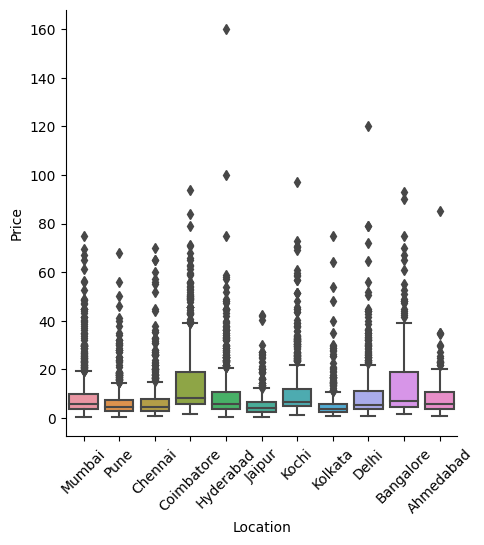

In [798]:
cat_plot("Location", "Price", data= data)

#### `Year`

연식은 차 가격에 정말 큰 영향을 미치는 요소 중 하나이다.

In [799]:
data.Year.value_counts()

Year
2014    794
2015    740
2016    737
2013    639
2017    586
2012    562
2011    452
2010    333
2018    298
2009    191
2008    162
2007    105
2019    102
2006     66
2005     42
2004     25
2003     14
2002     11
2000      4
2001      4
1998      3
1999      2
Name: count, dtype: int64

정말 오래된 연식도 존재함을 확인할 수 있다.

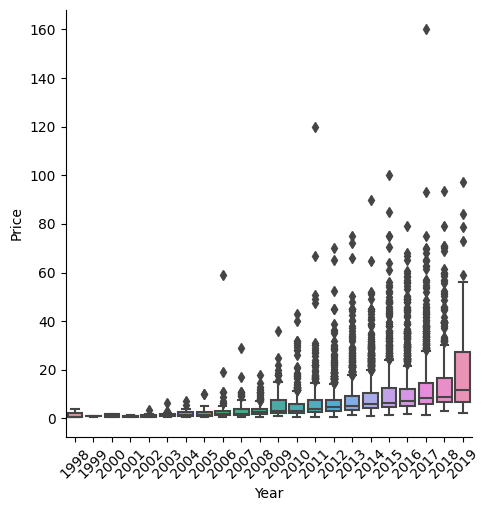

In [800]:
cat_plot("Year","Price",data=data)

#### `Kilometers_Driven`

<Axes: ylabel='Density'>

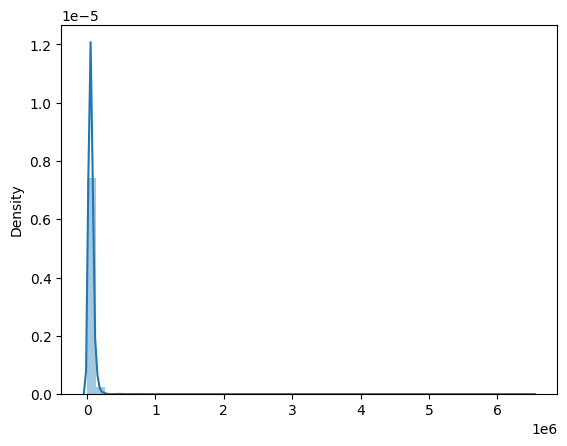

In [801]:
sns.distplot(data[["Kilometers_Driven"]])

높은 skewed를 확인할 수 있음. 따라서 `price`와 동일하게 로그를 취하고자 한다.

In [802]:
data['log_Kilometers_Driven'] = np.log(data['Kilometers_Driven'])

<Axes: ylabel='Density'>

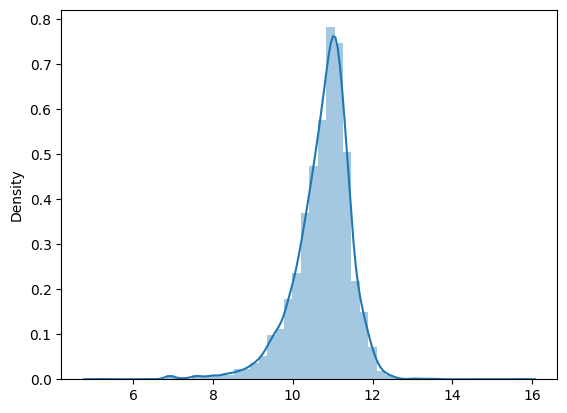

In [803]:
sns.distplot(data[["log_Kilometers_Driven"]])

#### `Fuel_Type`

연료의 타입 또한 가격에 영향을 줄 수 있다.

In [804]:
data.Fuel_Type.value_counts()

Fuel_Type
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: count, dtype: int64

Diesel과 Petrol의 비중이 가장 큰 것을 볼 수 있다.

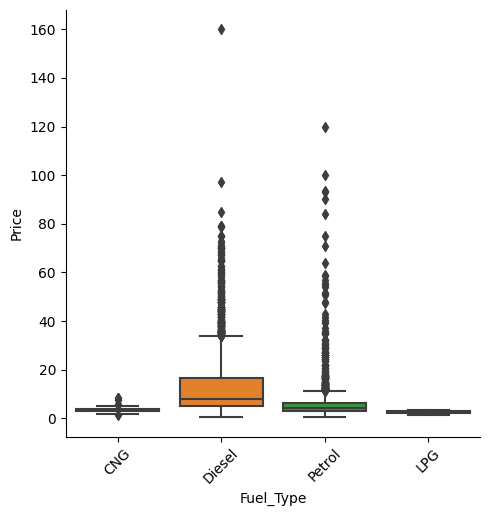

In [805]:
cat_plot("Fuel_Type","Price",data=data)

#### `Owner__Type`

거래 횟수는 가격 설정에 있어서 큰 비중을 차지한다.

In [806]:
data.Owner_Type.value_counts()

Owner_Type
First             4839
Second             925
Third              101
Fourth & Above       7
Name: count, dtype: int64

실제로도 First, Second, Third, Fourth&Above 순으로 거래도 많고, 가격도 높다.

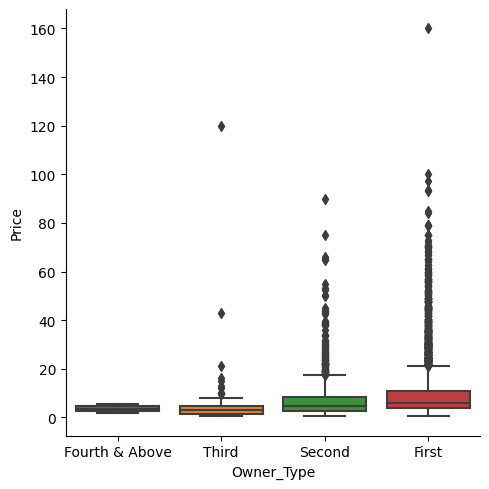

In [807]:
# 가격이 낮은 순으로 정렬하여 catplot 만듦
sns.catplot(x='Owner_Type', y='Price', data=data, kind='box', order=data.groupby('Owner_Type').Price.mean().sort_values().index)
plt.show()

#### `Engine`

<Axes: ylabel='Density'>

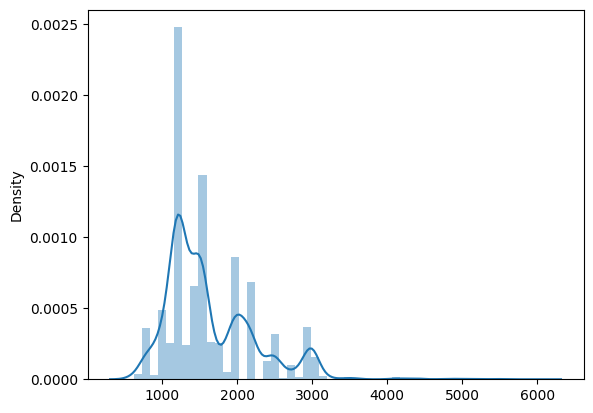

In [808]:
sns.distplot(data[["Engine"]])

skewed한 것을 확인할 수 있다. 따라서 이 또한 로그를 취해주고자 한다.

In [809]:
data['log_Engine'] = np.log(data['Engine'])

<Axes: ylabel='Density'>

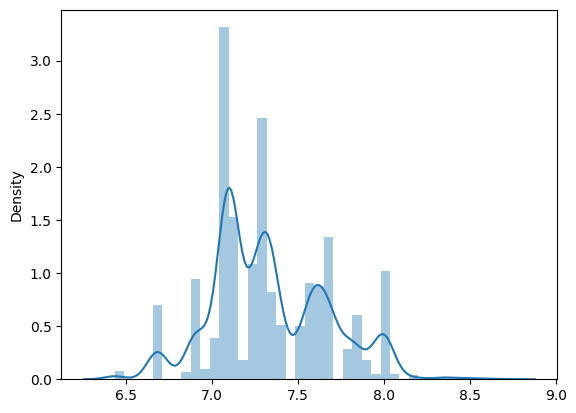

In [810]:
sns.distplot(data[["log_Engine"]])

#### `Power`

<Axes: ylabel='Density'>

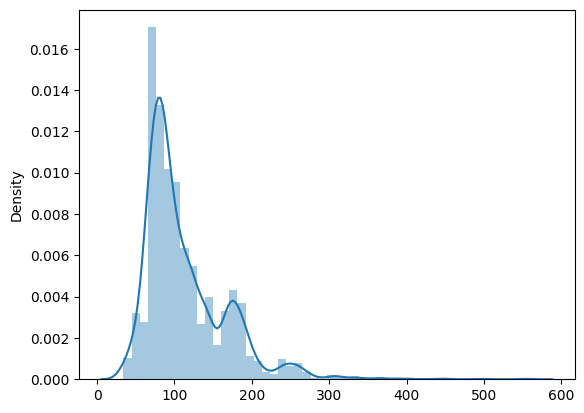

In [811]:
sns.distplot(data[["Power"]])

skewed임을 확인할 수 있음. 따라서 이 또한 로그를 취해주고자 한다.

In [812]:
data['log_Power'] = np.log(data['Power'])

<Axes: ylabel='Density'>

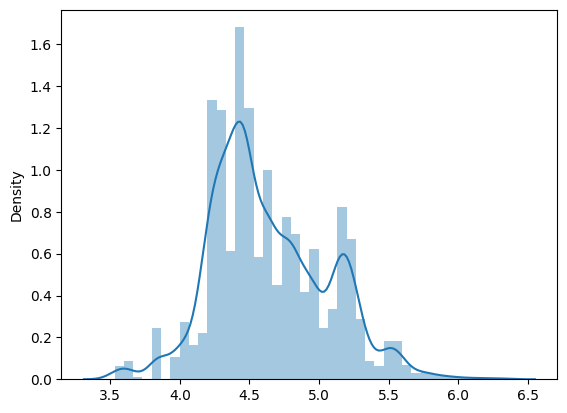

In [813]:
sns.distplot(data[["log_Power"]])

#### `Mileage`

<Axes: ylabel='Density'>

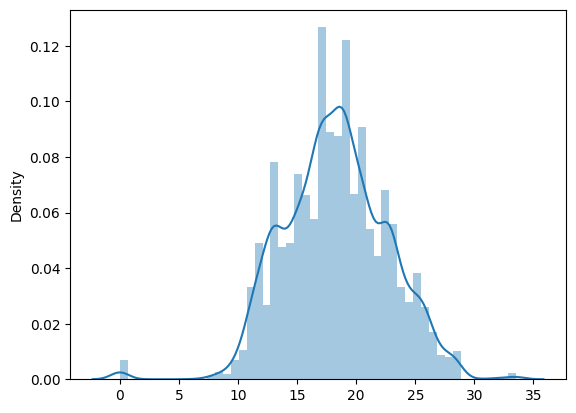

In [814]:
sns.distplot(data[["Mileage"]])

이는 정규분포 형태를 띠고 있기 때문에 따로 로그를 취하지 않는다.

In [815]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,log_price,log_Kilometers_Driven,log_Engine,log_Power
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919,1.845541,10.749855,7.333997,4.637768
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453,0.864006,0.718008,0.338206,0.416397
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000,-0.820981,5.141664,6.436150,3.532226
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500,1.257750,10.416985,7.088409,4.317488
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000,1.749200,10.870642,7.310216,4.581902
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000,2.302585,11.190000,7.596392,4.927978
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000,5.075174,15.687313,8.699181,6.327937


#### features 파악

In [816]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'log_price', 'brand', 'log_Kilometers_Driven', 'log_Engine',
       'log_Power'],
      dtype='object')

In [817]:
# 실제로 사용하는 features
use_cols = ['brand','Location','Year','Fuel_Type','Transmission','Owner_Type','Mileage','Seats','log_Kilometers_Driven', 'log_Engine','log_Power','log_price']

In [818]:
#카테고리형 features
cat_cols = ['brand','Location','Fuel_Type','Transmission','Owner_Type','Year','Seats']
#수치형 features
num_cols = ['Mileage','log_Kilometers_Driven','log_Engine','log_Power','log_price']
#target
target_col = ['log_price']

In [819]:
data = data[use_cols]

data[use_cols].head()

,brand,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,log_Kilometers_Driven,log_Engine,log_Power,log_price
0,Maruti,Mumbai,2010,CNG,Manual,First,26.60,5.0,11.184421,6.905753,4.063198,0.559616
1,Hyundai,Pune,2015,Diesel,Manual,First,19.67,5.0,10.621327,7.366445,4.837868,2.525729
2,Honda,Chennai,2011,Petrol,Manual,First,18.20,5.0,10.736397,7.089243,4.485260,1.504077
3,Maruti,Chennai,2012,Diesel,Manual,First,20.77,7.0,11.373663,7.129298,4.485936,1.791759
4,Audi,Coimbatore,2013,Diesel,Automatic,Second,15.20,5.0,10.613246,7.584773,4.947340,2.875822


In [820]:
target = data["log_price"]
feature = data.drop(['log_price'], axis=1)

#### train 데이터 // test 데이터 나누기

In [821]:
from sklearn.model_selection import train_test_split
# 데이터를 train과 test로 분리
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

In [822]:
feature

,brand,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,log_Kilometers_Driven,log_Engine,log_Power
0,Maruti,Mumbai,2010,CNG,Manual,First,26.60,5.0,11.184421,6.905753,4.063198
1,Hyundai,Pune,2015,Diesel,Manual,First,19.67,5.0,10.621327,7.366445,4.837868
2,Honda,Chennai,2011,Petrol,Manual,First,18.20,5.0,10.736397,7.089243,4.485260
3,Maruti,Chennai,2012,Diesel,Manual,First,20.77,7.0,11.373663,7.129298,4.485936
4,Audi,Coimbatore,2013,Diesel,Automatic,Second,15.20,5.0,10.613246,7.584773,4.947340
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,Diesel,Manual,First,28.40,5.0,10.217020,7.129298,4.304065
6015,Hyundai,Jaipur,2015,Diesel,Manual,First,24.40,5.0,11.512925,7.021084,4.262680
6016,Mahindra,Jaipur,2012,Diesel,Manual,Second,14.00,8.0,10.915088,7.823246,4.718499
6017,Maruti,Kolkata,2013,Petrol,Manual,First,18.90,5.0,10.736397,6.905753,4.206184


In [823]:
train.shape

(4780, 12)

In [824]:
test.shape

(1195, 12)

#### 회귀분석 및 회귀진단 모델링

In [825]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm 

#### 변수들 간 상관관계 파악하기

앞서 확인했을 때 engine, power, mileage 간의 상관관계가 높은 것을 확인할 수 있었다.

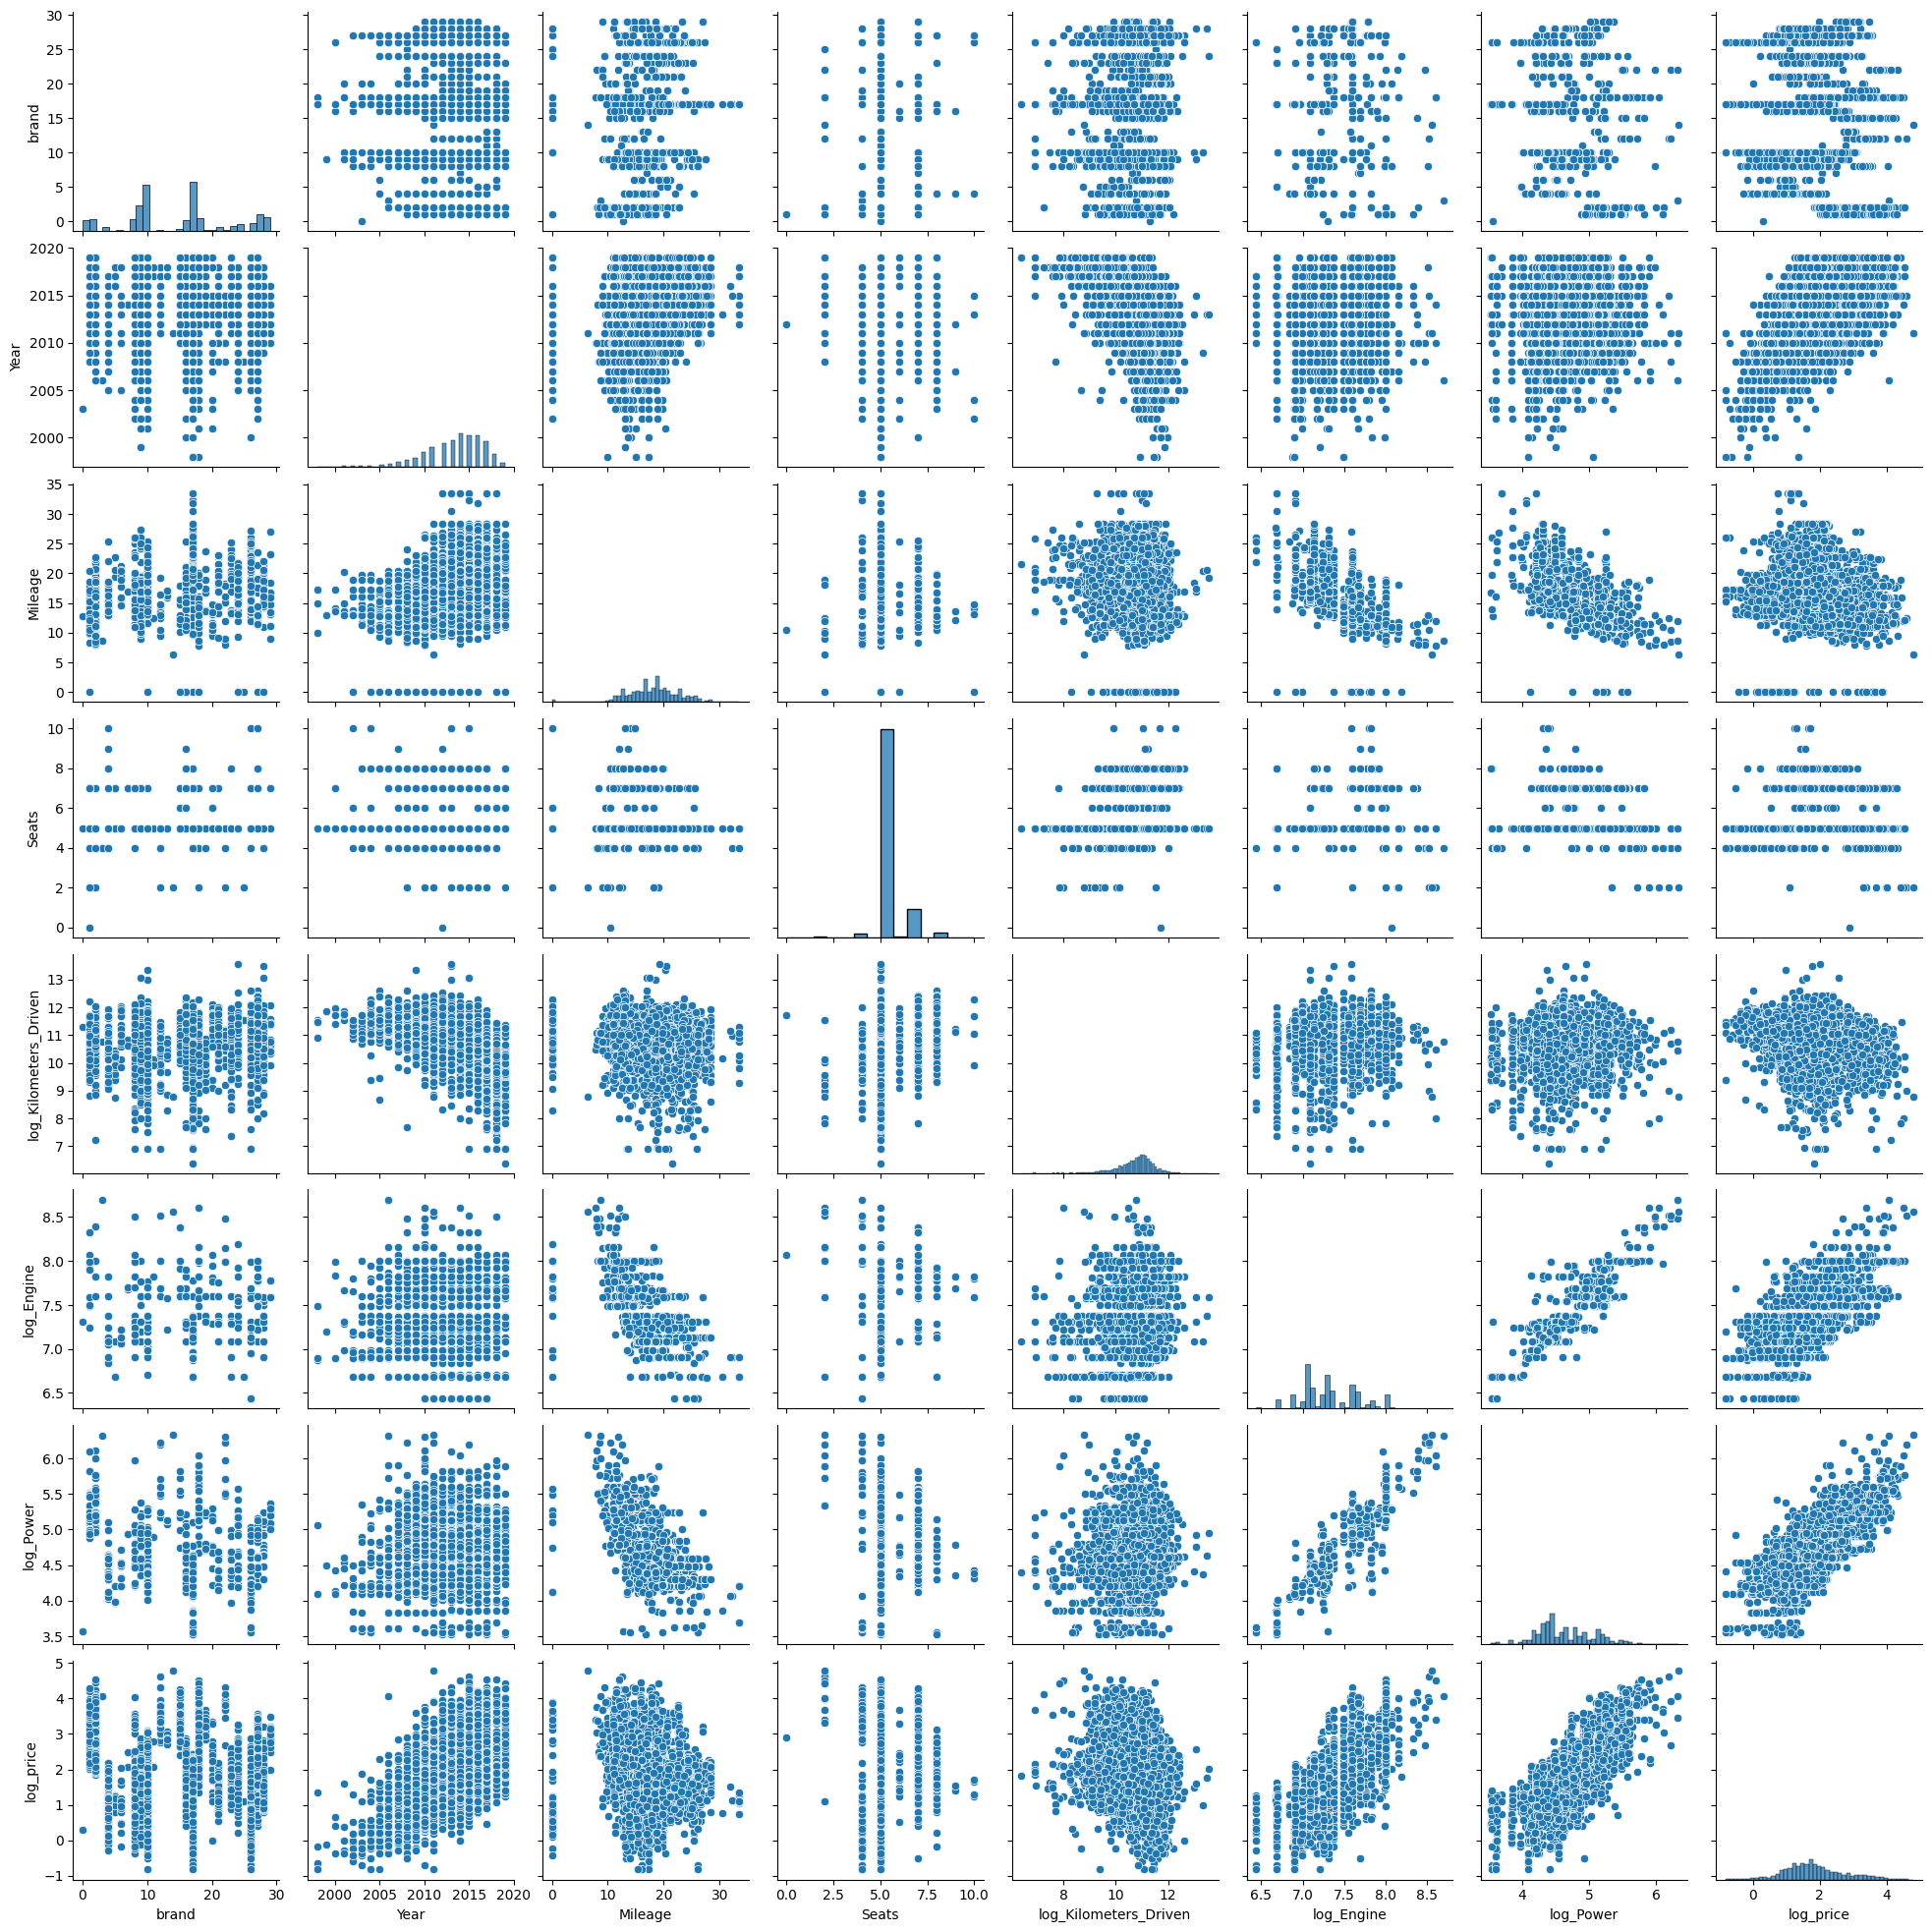

In [826]:
sns.pairplot(train)
plt.show()

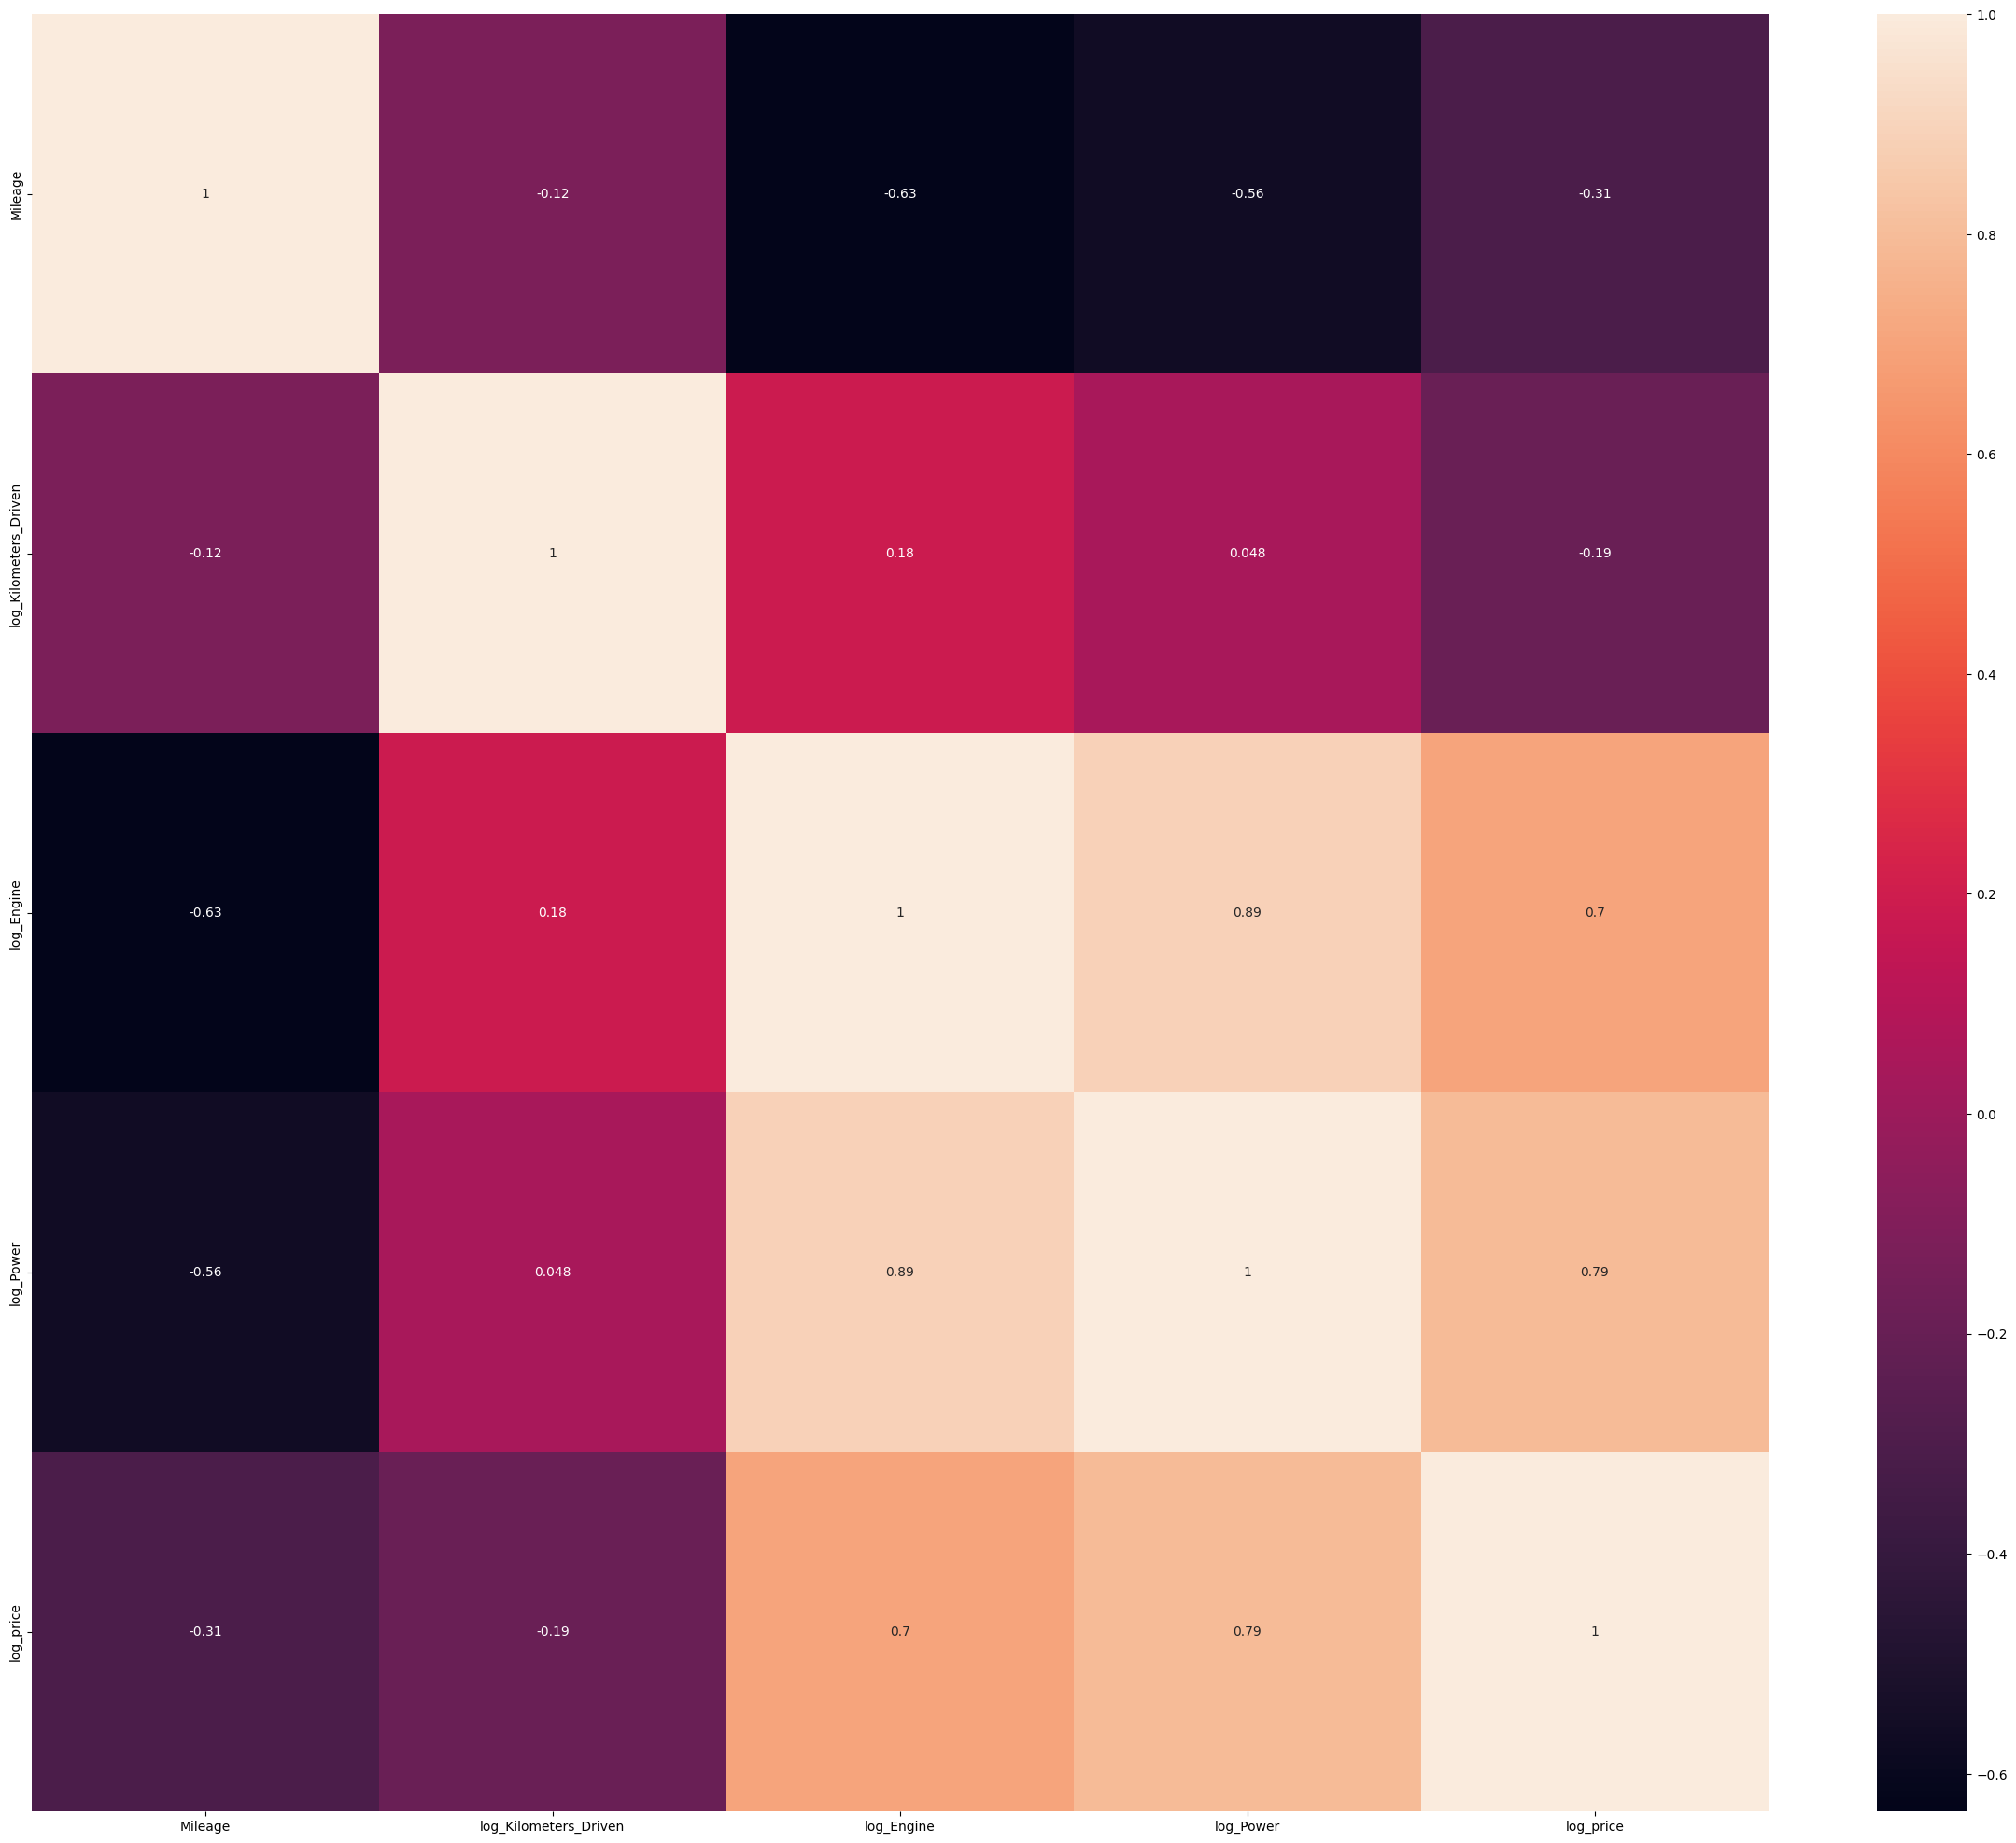

In [827]:
plt.figure(figsize = (30, 25))
sns.heatmap(data=data[num_cols].corr(), annot = True)
plt.show()

log_price는 log_Power와 log_Engine과 높은 상관관계를 나타내는 것을 확인할 수 있다.

In [828]:
# X_train, y_train, X_test, y_test 생성
X_train = train.drop('log_price', axis=1)
y_train = train['log_price']

X_test = test.drop('log_price', axis=1)
y_test = test['log_price']

# statsmodel 적합 
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X, lm

In [829]:
X_train_model1, lm_model = build_model(X_train, y_train)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  5872 non-null   object 
 1   Location               5872 non-null   object 
 2   Year                   5872 non-null   int64  
 3   Fuel_Type              5872 non-null   object 
 4   Transmission           5872 non-null   object 
 5   Owner_Type             5872 non-null   object 
 6   Mileage                5872 non-null   float64
 7   Seats                  5872 non-null   float64
 8   log_Kilometers_Driven  5872 non-null   float64
 9   log_Engine             5872 non-null   float64
 10  log_Power              5872 non-null   float64
 11  log_price              5872 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 596.4+ KB
